<a href="https://colab.research.google.com/github/Rohit-Roby/Project/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install objaverse
!pip install trimesh
!pip install open3d
!pip install torchsummary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7394 sha256=5076444cf627cf90b65c5284b4c55bcf54b19ba2c40a0131e4e5a9c832c86731
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 105.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.4 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Unins

^C


In [1]:
# Import libraries
import objaverse
import nltk
from nltk.corpus import stopwords  # for stop word removal
from nltk.stem import PorterStemmer  # for stemming (or use WordNetLemmatizer for lemmatization)
import string
import trimesh
import os
import shutil
import multiprocessing
nltk.download('stopwords')
import numpy as np
from matplotlib import pyplot as plt
import open3d as o3d
import torch
import torchsummary

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Loading the dataset files and dowloading 3d model**

In [2]:
#loading Uids
uids = objaverse.load_uids()
len(uids), type(uids)


(798759, list)

In [3]:

# lvis_annotations
lvis_annotations = objaverse.load_lvis_annotations()

# Sort the dictionary by value in descending order and select the top 20 items
items = dict(sorted(lvis_annotations.items(), key=lambda item: len(item[1]), reverse=True))
items.keys()

dict_keys(['chair', 'seashell', 'antenna', 'shield', 'snowman', 'chandelier', 'gravestone', 'cone', 'control', 'sword', 'armor', 'doughnut', 'banana', 'ring', 'fireplug', 'mushroom', 'fighter_jet', 'figurine', 'monitor_(computer_equipment) computer_monitor', 'mug', 'owl', 'shoe', 'helicopter', 'skateboard', 'soccer_ball', 'rifle', 'teddy_bear', 'bicycle', 'die', 'guitar', 'heart', 'race_car', 'lion', 'mask', 'gun', 'pumpkin', 'rabbit', 'sculpture', 'spectacles', 'apple', 'wedding_ring', 'telephone', 'elephant', 'police_cruiser', 'airplane', 'crab_(animal)', 'globe', 'lamppost', 'lampshade', 'windmill', 'toilet', 'trunk', 'pickup_truck', 'fan', 'mascot', 'shark', 'machine_gun', 'piano', 'pony', 'motor_vehicle', 'vase', 'sunglasses', 'wolf', 'frog', 'pottery', 'bookcase', 'penguin', 'spider', 'car_(automobile)', 'keg', 'table', 'television_set', 'wineglass', 'butterfly', 'crate', 'necklace', 'computer_keyboard', 'fire_extinguisher', 'manhole', 'armchair', 'coin', 'pizza', 'sportswear', '

In [4]:
len(items)

1156

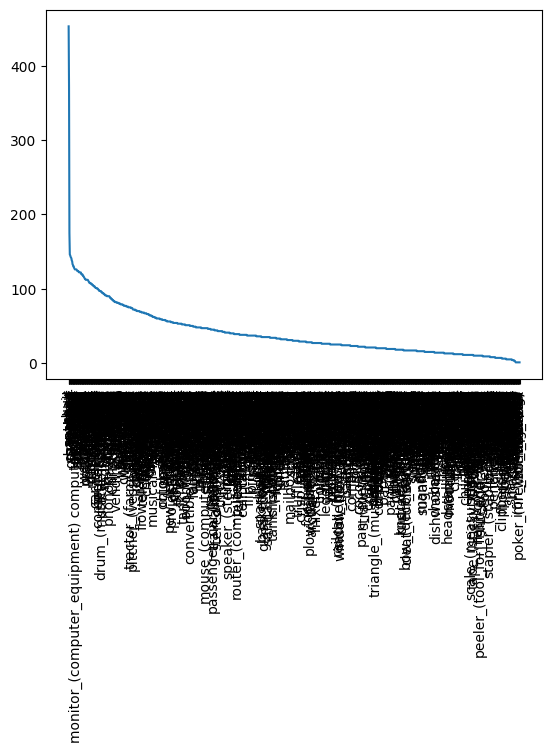

In [5]:

# Plot the keys against the lengths of the values
plt.xticks(rotation='vertical')
plt.plot(list(items.keys()), [len(value) for value in items.values()])
plt.show()


In [6]:
# # Load Objaverse annotations
# uids = []  # Initialize an empty list
# for uid_list in items.values():
#     uids.extend(uid_list)  # Add UIDs individually


In [7]:
len(uids)

798759

In [8]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
annotations = objaverse.load_annotations(uids)

 32%|███▎      | 52/160 [00:34<01:07,  1.61it/s]

In [ ]:
# objaverse_description = []
for annotation in annotations.values():
    if isinstance(annotation, dict):
        tags = annotation.get("tags")  # No default value, get returns 'None' if key is missing
        if tags:  # Check if tags exists
            tag_descriptions = [tag['name'] for tag in tags]
            # ... (Rest of your code)
            description = " ".join(tag_descriptions)
             # Store tags and description with annotation
            annotation["description"] = description  # adding a description field
            # objaverse_description.append(description)

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['uids'] = uids



**Preprocessing of Text Description**

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def clean_description(description):
    # Define stop words
    stop_words = set(stopwords.words("english"))


    # Remove punctuation
    text = description.translate(str.maketrans('', '', string.punctuation))

    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Lowercase conversion
    text = text.lower()

    # Stemming (or lemmatization)
    stemmer = PorterStemmer()  # You can replace this with WordNetLemmatizer for lemmatization
    text = ' '.join([stemmer.stem(word) for word in text.split()])

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text


df['description'] = df['uids'].map(lambda uid: clean_description( annotations[uid]['description']))

In [ ]:
import numpy as np
df['description'].replace('', np.nan, inplace=True)
df = df.dropna()

In [ ]:
processes = multiprocessing.cpu_count()
processes
objects = objaverse.load_objects(
    uids = df['uids'].iloc[:2500],
    download_processes = processes
)

In [ ]:
# Define the subfolder and parent folder paths
parent_dir = '/root/.objaverse/hf-objaverse-v1/glbs'

# Walk through the parent directory
for subdir, dirs, files in os.walk(parent_dir):
    for file in files:
        # Construct the file path
        file_path = os.path.join(subdir, file)
        # Construct the destination path
        dest_path = os.path.join(parent_dir, file)
        # Move the file to the parent directory
        shutil.move(file_path, dest_path)
    # If the current directory is not the parent directory, delete the subdirectory
    if subdir != parent_dir:
        os.rmdir(subdir)

df['glb_path'] = df['uids'].iloc[:2500].map(lambda x: objects[x])

In [ ]:
df.head()

In [ ]:
import re
# Function to remove "/glbs"
def remove_glbs(path):
    return re.sub(r'\d{3}-\d{3}/', '', path)    # Replace '/glbs' with an empty string

# Apply the function using map
df['glb_path'] = df['glb_path'].map(remove_glbs)

In [ ]:
import time

def verbose_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"{func.__name__} took {end_time - start_time:.2f} seconds to execute.")
        return result
    return wrapper

In [ ]:
@verbose_time
def custom_function():
    # Your custom function code
    pass

# To use the verbose time decorator, just call your function:
custom_function()

In [ ]:
@verbose_time
def custom_function():
    # Your custom function code
    pass

# To use the verbose time decorator, just call your function:
custom_function()

**Preprocessing of 3d model into point cloud**

In [ ]:
import os
def get_model_paths(base_dir):
    model_paths = []
    for subdir, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith(".glb"):
                file_path = os.path.join(subdir, file)
                model_paths.append(file_path)
    return model_paths
base_dir ='/root/.objaverse/hf-objaverse-v1/glbs'
model_paths = get_model_paths(base_dir)

In [ ]:
df.head()

In [ ]:
df.to_csv('/root/.objaverse/Dataset')
import pandas as pd
df = pd.read_csv('/root/.objaverse/Dataset')

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

# glbs = model_paths[0:5]
# # Create a figure and axes for the subplots
# fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# # Loop through each subplot and display the mesh
# for i, ax in enumerate(axs.flat):
#     # Plot mesh in each subplot
#     for glb in glbs:
#       if glb:
#           mesh = o3d.io.read_triangle_mesh(glb)
#           ax = o3d.visualization.draw_plotly([mesh])
#       else:
#           # Hide empty subplots
#           ax.axis('off')
# plt.show()


**Voxelization using numpy**

In [ ]:
import numpy as np
import os
from scipy.ndimage import zoom
from multiprocessing import Pool, cpu_count
# import pygltflib

**voxelization using open3d**

In [ ]:
dir = '/root/.objaverse/hf-objaverse-v1/glbs'
num_processes = multiprocessing.cpu_count()  # Use the number of CPU cores


In [ ]:
df.head()

In [ ]:
@verbose_time
def o3d_voxelize(filepath):
    mesh = o3d.io.read_triangle_mesh(filepath)
    # os.path.split(filepath)[]
    print(mesh)
    # mesh.compute_vertex_normals()
    # fit to unit cube
    mesh.scale(1 / np.max(mesh.get_max_bound() - mesh.get_min_bound()),center=mesh.get_center())
    # o3d.visualization.draw([mesh])
    # print('voxelization')
    voxel_grid = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh, voxel_size=0.05)
    # o3d.visualization.draw([voxel_grid])
    return voxel_grid

In [ ]:
@verbose_time
#we convert to pytorch tensors to use later for training the GAN
def voxel_grid_to_tensor(voxel_grid, target_shape):

    voxels = np.asarray(voxel_grid.get_voxels())
    if len(voxels) == 0:
        return torch.empty(0)
    voxel_positions = np.array([voxel.grid_index for voxel in voxels])
    if voxel_positions.size == 0:
        return torch.empty(0)
    max_coords = voxel_positions.max(axis=0)
    tensor_shape = tuple(max_coords + 1)
    voxel_tensor = torch.zeros(tensor_shape, dtype=torch.float32)
    voxel_tensor[tuple(voxel_positions.T)] = 1

    # Rescale tensor to target shape
    scaling_factors = [target_shape[i] / voxel_tensor.shape[i] for i in range(3)]
    voxel_tensor_rescaled = torch.tensor(zoom(voxel_tensor, scaling_factors, order=0))  # Use nearest neighbor scaling

    # Print the final shape of the tensor
    # print("Final tensor shape:", voxel_tensor_rescaled.shape)

    return voxel_tensor_rescaled



In [ ]:
df.head()

**Visualizing voxel grid**

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# def visualize_voxel_grid(voxel_grid):
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')

#     # Extract voxel grid dimensions
#     x_size, y_size, z_size = voxel_grid.shape

#     # Iterate over each voxel
#     for x in range(1):
#         for y in range(1):
#             for z in range(1):
#                 if voxel_grid[x, y, z] == 1:  # Filled voxel
#                     ax.scatter(x, y, z, color='b')

#     # Set labels and title
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')
#     ax.set_title('Voxel Grid Visualization')

#     plt.show()

# # Example usage
# # voxel_grid = np.random.randint(0, 2, size=(16, 16, 16))  # Random voxel grid for demonstration
# visualize_voxel_grid(voxel_grid)

**PRETRAINED TEXT ENCODER USING T5**

In [ ]:
import torch
import torch.nn as nn
import transformers
from transformers import T5ForConditionalGeneration, AutoTokenizer

In [ ]:

class TextEncoder(nn.Module):
    def __init__(self, model_name="t5-large"):  # Choose a suitable T5 model size
        super().__init__()
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.transformer = T5ForConditionalGeneration.from_pretrained(model_name)

    def forward(self, text_input):
        input = self.tokenizer(text_input, return_tensors="pt")  # Tokenize input
        start_token_id = self.tokenizer.unk_token_id   # Or the correct start token for your model.
        decoder_input_ids = torch.tensor([[start_token_id]])
        input['decoder_input_ids'] = decoder_input_ids
        # print(input)
        outputs = self.transformer(**input)  # T5 model expects specific keyword arguments

        # Select appropriate representation
        # hidden_states = outputs.last_hidden_state  # Option 1: Last hidden state
        # Or potentially the encoder outputs if you need it for rephrasing later
        hidden_states = outputs.encoder_last_hidden_state

        # Simple mean pooling
        latent_representation = hidden_states.mean(dim=1)

        return latent_representation

In [ ]:
sample_descriptions = ["A modern living room A minimalist bedroom A chair "]
text_encoder = TextEncoder()
for description in sample_descriptions:
    latent_representation = text_encoder(description)
    print(f"Description: {description}")
    print(f"Latent Representation: {latent_representation.shape}") # Check the shape
    print("--------------")

**GENERATOR AND DISCRIMINATOR MODELS**

In [ ]:
import torch.nn as nn

# Generator architecture
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(latent_dim, 512 * 4 * 4 * 4),
            nn.ReLU(True)
        )
        self.deconv = nn.Sequential(
            nn.ConvTranspose3d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose3d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose3d(128, 1, kernel_size=4, stride=2, padding=1),
            # nn.Sigmoid()
            nn.Tanh()
        )

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 512, 4, 4, 4)  # Reshape to 3D volume
        x = self.deconv(x)
        return x


In [ ]:
# from torchsummary import summary

# generator = Generator(1024)
# summary(generator, (1,1024))

In [ ]:

# Discriminator architecture
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv3d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv3d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv3d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout3d(0.4)
        )
        self.fc = nn.Sequential(
            nn.Linear(256 * 4 * 4 *4 , 1),
            # nn.Sigmoid()
            nn.Tanh()
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(-1, 256 * 4 * 4 *4 )  # Flatten
        x = self.fc(x)
        return x


**Model Training**

In [ ]:
# voxel_tensors  # List of voxel tensors
text_descriptions = df['description'].tolist()   #
# List of annotations corresponding to voxel tensors
# text_encoder = TextEncoder()


In [ ]:
# type(voxel_tensors)
from scipy.ndimage import zoom

voxel_grids = [o3d_voxelize(filepath) for filepath in model_paths]

target_shape = (32,32,32)
# voxel_grids = [o3d_voxelize(filepath) for filepath in model_paths]
voxel_tensors = [voxel_grid_to_tensor(voxel_grid, target_shape) for voxel_grid in voxel_grids]

In [ ]:
# text_encoder = TextEncoder()

voxel_tensors_sqe = [tensor.unsqueeze(0) for tensor in voxel_tensors]

In [ ]:
voxel_tensors_sqe[19].shape

In [ ]:
tensor_shapes = []
for tensor in voxel_tensors_sqe:  # Replace 'my_tensor_list' with your actual storage
    tensor_shapes.append(tensor.shape)


In [ ]:
all_same_size = True  # Initial assumption
reference_shape = tensor_shapes[0]  # Take the first shape as a reference
count =0
voxel_tensors_sq = []
for tensor in voxel_tensors_sqe:  # Iterate from the second shape onwards
    if tensor.shape != reference_shape:
        all_same_size = False
        count = count +1
        # break  # Exit the loop as soon as you find a mismatch
    else :
        voxel_tensors_sq.append(tensor)
if all_same_size:
    print("All tensors have the same size")
else:
    print("Tensors have different sizes")
    print(count)


In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

In [ ]:
voxel_tensors_sq = [tensor.to(device) for tensor in voxel_tensors_sq]


In [ ]:
len(voxel_tensors_sq)

In [ ]:
# Define the file path to save the tensor data
file_path = "/root/data/tensor_data.pt"

# /content/tensor_data.pth
# Save the tensor data
torch.save(voxel_tensors_sq, file_path)

In [ ]:
file_path ='/tensor_data.pt'


In [ ]:
# import torch
# # Load the saved NumPy array
loaded_tensor = torch.load(file_path,map_location=torch.device(device))

In [ ]:
type(loaded_tensor)

In [ ]:
len(loaded_tensor)

In [ ]:
loaded_tensor[0].shape

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# text_encoder = TextEncoder()
batch_size = 256  # Define your batch size
num_epochs = 100  # Define the number of epochs
learning_rate = 0.002  # Define the learning rate
train_loader = torch.utils.data.DataLoader(
    voxel_tensors_sq, batch_size=batch_size, shuffle=True
)
# Assuming you have defined your generator and discriminator networks
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)
generator = generator.to(device)
discriminator = discriminator.to(device)

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0)

# Apply the initialization to the networks
generator.apply(weights_init)
discriminator.apply(weights_init)
# Assuming you have defined your loss function and optimizers
criterion = nn.BCELoss().to(device)
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))

latent_dim = 1024
# num_epochs = 10  # Assuming you have defined the number of epochs


# discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Assuming you have a DataLoader for your training data
# train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


@verbose_time
def train_gen(train_loader):
    for n, voxelgrid_tensor in enumerate(train_loader):
            # Data for training the discriminator
            # print(n)
            # print('voxelgrid_tensor ',voxelgrid_tensor.shape)
            # batch_size = voxelgrid_tensor.size(0)  # Get the actual batch size
            # print(batch_size)
            voxelgrid_tensor = voxelgrid_tensor.to(device)
            real_labels = torch.ones((batch_size, 1)).to(device)
            fake_labels = torch.zeros(batch_size, 1).to(device)
            # real_labels = torch.ones(( 1))

            # print('real_labels.shape',real_labels.shape)
            latent_space_samples = torch.randn((batch_size, latent_dim)).to(device)
            # latent_space_samples = torch.randn(( 1024))
            # print('latent_space_samples .shape',latent_space_samples.shape)
            # voxelgrid_tensor = voxelgrid_tensor.to(device)
            latent_space_samples = latent_space_samples.to(device)
            generated_samples = generator(latent_space_samples)
            # print('generated_samples.shape',generated_samples.shape)
            # print('generated_samples.detach().shape',generated_samples.detach().shape)
            # print('voxelgrid_tensor.shape',voxelgrid_tensor.shape)
            # print('generated_samples.detach().shape',generated_samples.detach().shape)

            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator_real = discriminator(voxelgrid_tensor)
            output_discriminator_fake = discriminator(generated_samples.detach())  # Detach to avoid backpropagation through generator

            print('output_discriminator_fake.shape',output_discriminator_fake.shape,'real_labels.shape',real_labels.shape)
            print('output_discriminator_real.shape', output_discriminator_real.shape,'torch.zeros_like(real_labels).shape',torch.zeros_like(real_labels).shape )

            # Compute discriminator loss
            # if output_discriminator_real.shape == real_labels.shape:
            loss_discriminator_real = criterion(output_discriminator_real, real_labels)
            # loss_discriminator_fake = criterion(output_discriminator_fake, torch.zeros_like(real_labels))
            loss_discriminator_fake = criterion(output_discriminator_fake,fake_labels)

            discriminator_loss = (loss_discriminator_real + loss_discriminator_fake) / 2

            discriminator_loss.backward()
            optimizer_discriminator.step()

            # Data for training the generator
            # latent_space_samples = torch.randn((batch_size, 1024)).to(device)

            # Training the generator
            generator.zero_grad()
            generated_samples = generator(latent_space_samples).to(device)
            output_discriminator_generated = discriminator(generated_samples)

            # Calculate the generator loss
            loss_generator = criterion(output_discriminator_generated, real_labels)
            loss_generator.backward()
            optimizer_generator.step()

            # Show loss
            if (epoch % 10 == 0) and (n == len(train_loader) - 1):
                print(f"Epoch: {epoch} Loss D.: {discriminator_loss.item()}")
                print(f"Epoch: {epoch} Loss G.: {loss_generator.item()}")

for epoch in range(num_epochs):
    train_gen(train_loader)

In [ ]:

# After training, you can save your models if needed
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')


### ***Data Preparation: Preprocess your dataset to pair each text description with its corresponding voxel grid representation of the 3D model.***
Model Architecture:
Text Encoder: Convert text descriptions into a fixed-size vector representation, such as [1,1024].
Generator: Takes the output of the text encoder and generates voxel grids of size (16,16,16).
Discriminator: Takes voxel grids of size (16,16,16) as input and predicts whether they are real or generated.
Connecting the Components:
Pass the text description through the text encoder to get the fixed-size vector representation.
Feed this vector representation into the generator to produce a voxel grid.
Pass both the real voxel grids (from the dataset) and generated voxel grids through the discriminator.
Loss Functions:
Generator Loss: Use a combination of traditional image generation loss functions such as pixel-wise mean squared error (MSE) or binary cross-entropy loss.
Discriminator Loss: Train the discriminator to distinguish between real and generated voxel grids using binary cross-entropy loss.
Training:
Alternately train the generator and discriminator in a GAN-like setup:
Train the discriminator to correctly classify real and generated voxel grids.
Train the generator to fool the discriminator by generating voxel grids that the discriminator classifies as real.
Use techniques like mini-batch discrimination and label smoothing to improve stability.
Evaluation:
Assess the quality of generated 3D models using evaluation metrics such as Frechet Inception Distance (FID), Structural Similarity Index (SSIM), or human evaluation.
Fine-tuning and Iteration:
Fine-tune your model and experiment with different architectures, hyperparameters, and training strategies to improve performance.


Increasing the size of the voxel grid to (128, 128, 128) will have several implications:

Increased Memory Usage: Larger voxel grids require more memory to store both during training and inference. This means you'll need more RAM or VRAM, depending on whether you're training on CPU or GPU, respectively.
Higher Computational Complexity: With a larger grid, the number of voxels to process increases significantly. This leads to higher computational complexity for both the generator and discriminator networks, resulting in longer training times per iteration.
Architecture Adjustments: The architectures of the generator and discriminator networks will need to be adjusted to accommodate the larger input and output dimensions. For example, you may need to increase the number of layers, filters, or neurons in the networks to handle the increased complexity.
Training Stability: Larger voxel grids may lead to training instability, especially in the early stages of training. Techniques such as gradient clipping, batch normalization, and spectral normalization may be necessary to stabilize training.
Data Requirements: Generating high-resolution voxel grids requires more detailed and diverse training data to capture the complexity of real-world objects accurately. Ensure that your dataset is large and varied enough to support training with the larger voxel grid size effectively.
Evaluation Metrics: When evaluating the quality of generated models, consider using metrics that account for the increased resolution, such as voxel-based metrics or perceptual metrics like Frechet Inception Distance (FID) adapted for 3D data.
Hardware Limitations: Finally, ensure that your hardware can handle the increased memory and computational demands of training with larger voxel grids. High-performance GPUs with ample VRAM are typically required for training deep learning models with large inputs.
Overall, while increasing the voxel grid size to (128, 128, 128) may lead to higher-quality 3D model generation, it also comes with challenges related to memory usage, computational complexity, and training stability. Balancing these factors is essential for successful training and generation of high-fidelity 3D models.

In [ ]:
# Generator architecture
class ConditionalGenerator(nn.Module):
    super(ConditionalGenerator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(latent_dim + noise_dim, 512),
            nn.ReLU(True)
        )
        self.deconv = nn.Sequential(
            nn.ConvTranspose3d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(256),
            nn.ReLU(True),
            nn.ConvTranspose3d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(128),
            nn.ReLU(True),
            nn.ConvTranspose3d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(64),
            nn.ReLU(True),
            nn.ConvTranspose3d(64, 1, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()  # or nn.Tanh(), depending on your data normalization
        )


    def forward(self, latent_description, noise):
        x = torch.cat((latent_description, noise), 1)  # Concatenate latent description and noise
        x = self.fc(x)
        x = x.view(-1, 512, 1, 1, 1)  # Reshape to start the 3D volume
        x = self.deconv(x)
        return x


In [ ]:
class ConditionalDiscriminator(nn.Module):
    def __init__(self, latent_dim):
        super(ConditionalDiscriminator, self).__init__()
        # Define the architecture for processing the voxel tensor
        self.conv = nn.Sequential(
            nn.Conv3d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv3d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv3d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout3d(0.4)
        )
        # Define the architecture for processing the latent description
        self.fc_latent = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2, inplace=True)
        )
        # Combine the outputs from the voxel tensor and latent description
        self.fc_combined = nn.Sequential(
            nn.Linear(256 * 4 * 4 * 4 + 256, 1),
            nn.Sigmoid()
        )

    def forward(self, voxel_tensor, latent_description):
        voxel_features = self.conv(voxel_tensor)
        voxel_features = voxel_features.view(-1, 256 * 4 * 4 * 4)  # Flatten the voxel features
        latent_features = self.fc_latent(latent_description)  # Process the latent description
        combined_features = torch.cat((voxel_features, latent_features), 1)  # Concatenate the features
        validity = self.fc_combined(combined_features)  # Determine validity (real or fake)
        return validity


In [ ]:
generator = ConditionalGenerator(1024)
summary(generator, (1,1024))

In [ ]:
discriminator = ConditionalDiscriminator()
summary(discriminator,(1,32,32,32) ,(1,1024))